# Put on sticker
## Index
1. Module
2. Get a image
3. Face detector
4. Find position from face landmark index
5. Apply to sticker
6. Result
- 회고
    - Today's essential concept
    - From Ex
___
___

### Module
___

In [1]:
import os

import cv2
import dlib

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


### Get a image; picture and sticker
___

In [2]:
# https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1

In [3]:
img_path = os.getenv("HOME") + '/aiffel/Ex-8/'
img_single = cv2.imread(img_path+'img_single.jpg', 1)
img_group = cv2.imread(img_path+'img_group.jpeg', 0)

In [4]:
img_single = cv2.cvtColor(img_single, cv2.COLOR_BGR2RGB)
img_group = cv2.cvtColor(img_group, cv2.COLOR_BGR2RGB)

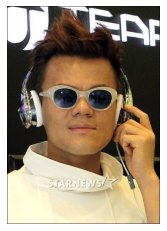

In [5]:
plt.imshow(img_single)
plt.axis('off')
plt.show()

In [8]:
img_single.shape

(620, 436, 3)

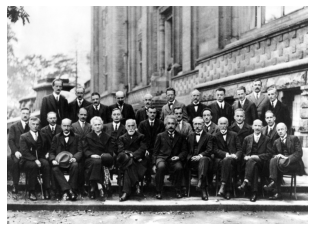

In [9]:
plt.imshow(img_group)
plt.axis('off')
plt.show()

In [10]:
img_group.shape

(1853, 2560, 3)

In [32]:
# prevent from restart, we need to copy one
img1 = img_single.copy()
img2 = img_group.copy()

### Face detector
___

In [12]:
detector_single = dlib.get_frontal_face_detector()
detector_group = dlib.get_frontal_face_detector()
detector_single

In [13]:
dlib_rects_single = detector_single(img_single, 1)
dlib_rects_group = detector_group(img_group, 1)
type(dlib_rects_single)

_dlib_pybind11.rectangles

In [33]:
# due to its huge size, open it in a text editor
# to get a description of dlib.pointer
help(dlib_rects_single)

Help on rectangles in module _dlib_pybind11 object:

class rectangles(pybind11_builtins.pybind11_object)
 |  An array of rectangle objects.
 |  
 |  Method resolution order:
 |      rectangles
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __bool__(...)
 |      __bool__(self: _dlib_pybind11.rectangles) -> bool
 |      
 |      Check whether the list is nonempty
 |  
 |  __contains__(...)
 |      __contains__(self: _dlib_pybind11.rectangles, x: _dlib_pybind11.rectangle) -> bool
 |      
 |      Return true the container contains ``x``
 |  
 |  __delitem__(...)
 |      __delitem__(*args, **kwargs)
 |      Overloaded function.
 |      
 |      1. __delitem__(self: _dlib_pybind11.rectangles, arg0: int) -> None
 |      
 |      Delete the list elements at index ``i``
 |      
 |      2. __delitem__(self: _dlib_pybind11.rectangles, arg0: slice) -> None
 |      
 |      Delete list elements using a slice object
 |  
 |  __eq__(...)
 |

In [15]:
for dlib_rect in dlib_rects_single:
    a = dlib_rect.br_corner()
    b = dlib_rect.tl_corner()

    cv2.rectangle(img_single, (a.x, a.y), (b.x, b.y), (0,255,0), 2, lineType=cv2.LINE_AA)

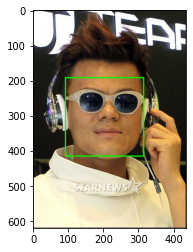

In [16]:
plt.imshow(img_single)
plt.show()

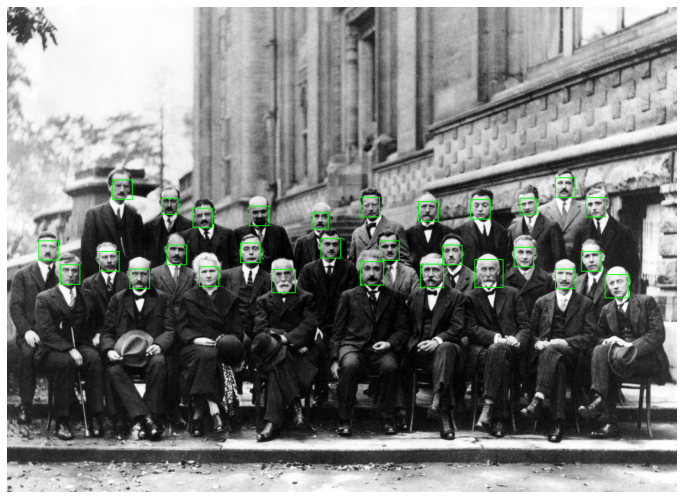

In [17]:
for dlib_rect in dlib_rects_group:
    a = dlib_rect.br_corner()
    b = dlib_rect.tl_corner()

    cv2.rectangle(img_group, (a.x, a.y), (b.x, b.y), (0,255,0), 2, lineType=cv2.LINE_AA)

img_group =  cv2.cvtColor(img_group, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img_group)
plt.show()

In [18]:
# the number of people
len(dlib_rects_group)

29

### Find position from face landmark index
___

In [19]:
# https://www.cv-foundation.org/openaccess/content_cvpr_2014/papers/Kazemi_One_Millisecond_Face_2014_CVPR_paper.pdf
# $ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# $ mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
# $ cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

# load pre-trained weight file

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
landmark_predictor

In [20]:
list_landmarks_single = []

for dlib_rect in dlib_rects_single:
    points = landmark_predictor(img_single, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks_single.append(list_points)

print(len(list_landmarks_single[0]))

68


In [21]:
list_landmarks_group = []

for dlib_rect in dlib_rects_group:
    points = landmark_predictor(img_group, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks_group.append(list_points)

print(len(list_landmarks_group[0]))

68


In [22]:
list_landmarks_group[0][:10]

[(1940, 938),
 (1941, 947),
 (1942, 956),
 (1943, 966),
 (1946, 975),
 (1952, 983),
 (1959, 990),
 (1968, 995),
 (1978, 997),
 (1987, 996)]

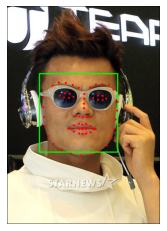

In [23]:
for landmark in list_landmarks_single:
    for point in landmark:
        cv2.circle(img_single, point, 3, (255, 0, 0), -1)

plt.imshow(img_single)
plt.axis('off')
plt.show()

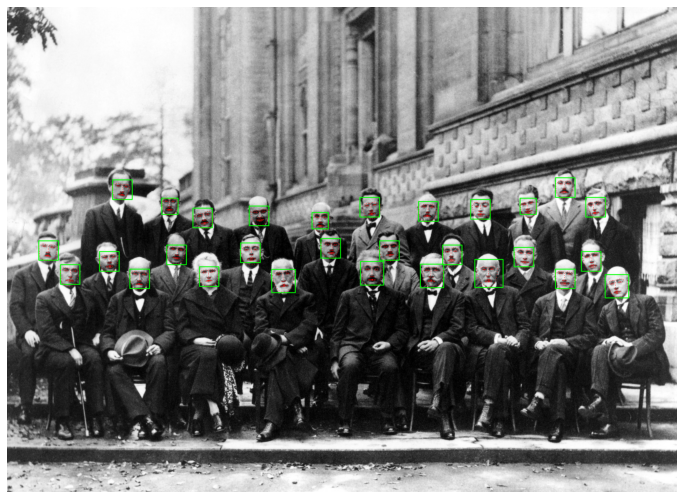

In [24]:
for landmark in list_landmarks_group:
    for point in landmark:
        cv2.circle(img_group, point, 1, (255, 0, 0), -1)

img_group_copy = img_group.copy()

plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img_group)
plt.show()

### Apply to sticker
___

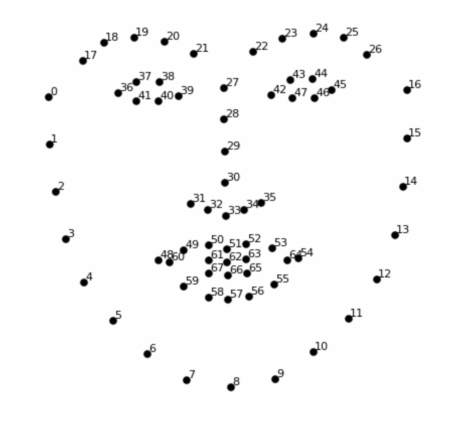

In [25]:
landmark_idx = os.getenv("HOME") + '/aiffel/Ex-8/face_landmark.png'
img = cv2.imread(landmark_idx, 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(img)
plt.show()

고양이 수염 사진 크기 : (512, 512, 3)


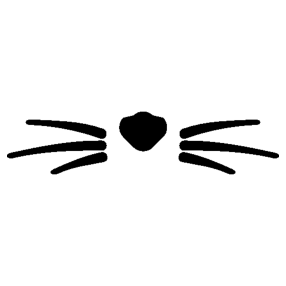

In [26]:
# load sticker
path = os.getenv("HOME") + '/aiffel/Ex-8/cat-whiskers.png'
sticker = cv2.imread(path)
sticker
print(f'고양이 수염 사진 크기 : {sticker.shape}')

plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(sticker)
plt.show()

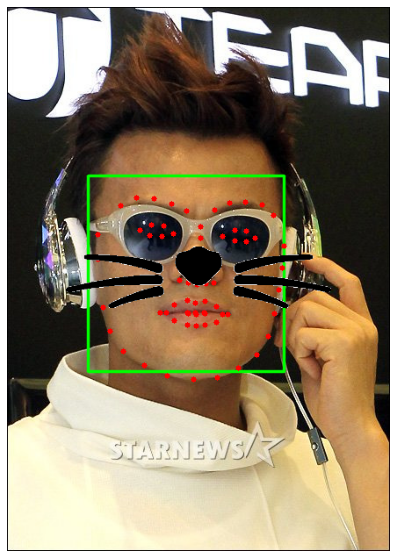

In [27]:
for dlib_rect, landmark in zip(dlib_rects_single, list_landmarks_single):
    s = sticker
    w = int(dlib_rect.width() * 1.35)
    h = w
    s = cv2.resize(s, dsize=(w, h))

    x = landmark[30][0] - dlib_rect.width()//2 - int(dlib_rect.width()*0.18)
    y = landmark[29][1] - int(w/2.5)
    
    sticker_area = img_single[y:y+s.shape[0], x:x+s.shape[1]]
    img_single[y:y+s.shape[0], x:x+s.shape[1]] = \
    np.where(s==255,sticker_area,s).astype(np.uint8)
    
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(img_single)
    plt.show()

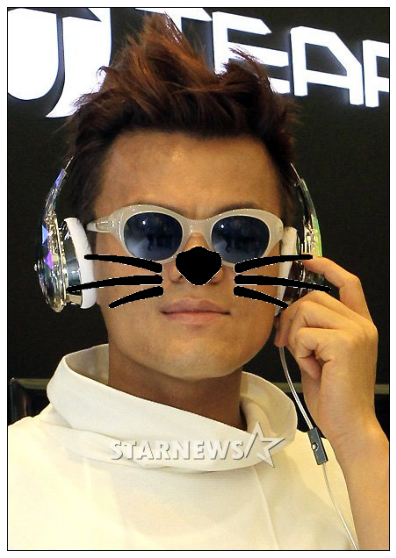

In [28]:
img1_final = img1.copy()

for dlib_rect, landmark in zip(dlib_rects_single, list_landmarks_single):
    s = sticker
    w = int(dlib_rect.width() * 1.35)
    h = w
    s = cv2.resize(s, dsize=(w, h))

    x = landmark[30][0] - dlib_rect.width()//2 - int(dlib_rect.width()*0.18)
    y = landmark[29][1] - int(w/2.5)    
    
    sticker_area = img1_final[y:y+s.shape[0], x:x+s.shape[1]]
    img1_final[y:y+s.shape[0], x:x+s.shape[1]] = \
    np.where(s==255,sticker_area,s).astype(np.uint8)
    
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(img1_final)
    plt.show()

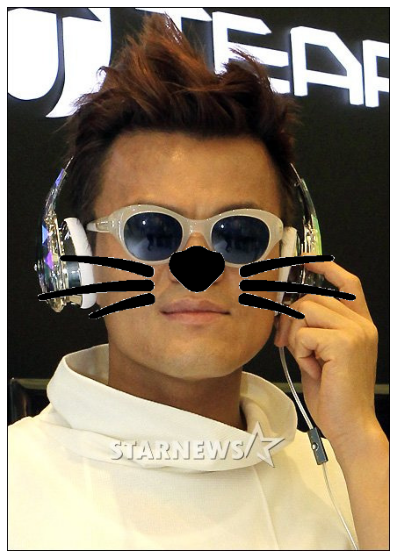

In [29]:
img1_final_final = img1.copy()

for dlib_rect, landmark in zip(dlib_rects_single, list_landmarks_single):
    s = sticker
    w = int(dlib_rect.width() * 1.35 * 1.2)
    h = w
    s = cv2.resize(s, dsize=(w, h))

    x = landmark[30][0] - dlib_rect.width()//2 - int(dlib_rect.width()*0.18 + w*0.09)
    y = landmark[29][1] - int(w/2.5)
    
    sticker_area = img1_final_final[y:y+s.shape[0], x:x+s.shape[1]]
    img1_final_final[y:y+s.shape[0], x:x+s.shape[1]] = \
    np.where(s==255,sticker_area,s).astype(np.uint8)
    
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(img1_final_final)
    plt.show()

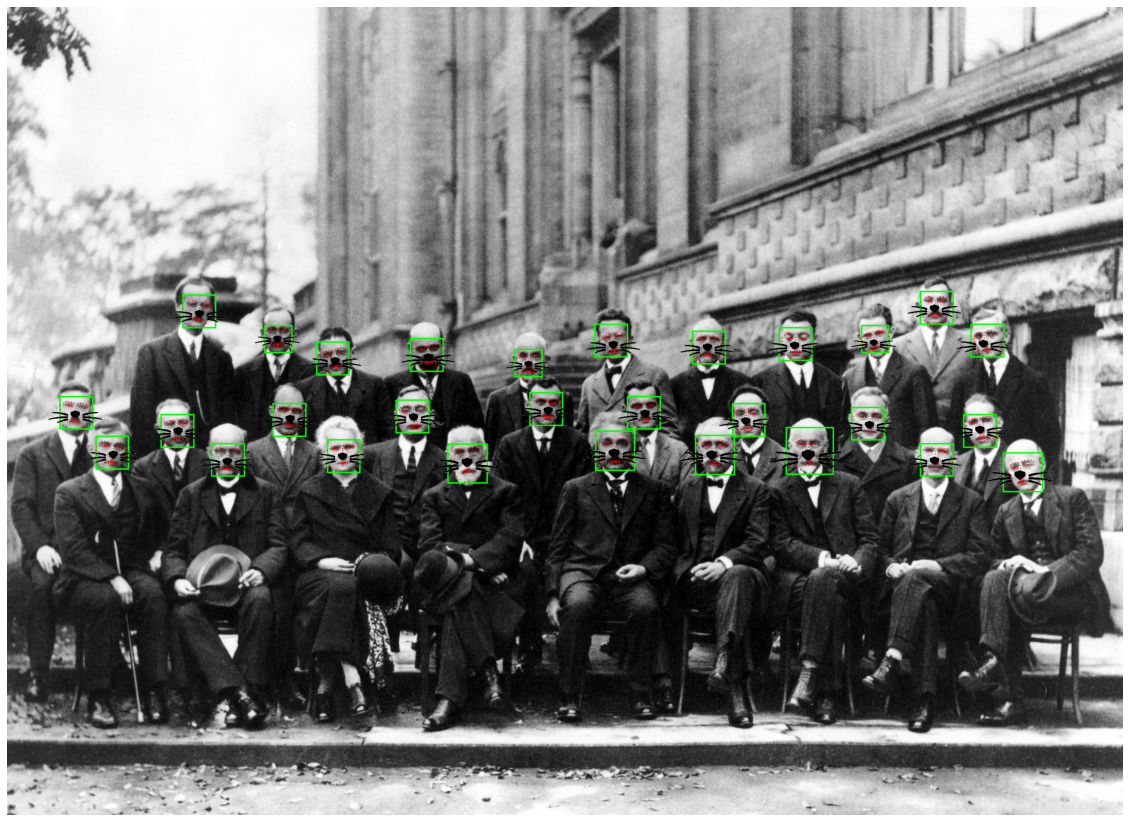

In [30]:
img_group_copy_copy = img_group_copy.copy()

for dlib_rect, landmark in zip(dlib_rects_group, list_landmarks_group):
    s = sticker
    w = int(dlib_rect.width() * 1.35 * 1.2)
    h = w
    s = cv2.resize(s, dsize=(w, h))

    x = landmark[30][0] - dlib_rect.width()//2 - int(dlib_rect.width()*0.18 + w*0.09)
    y = landmark[29][1] - int(w/2.5)
    
    sticker_area = img_group_copy_copy[y:y+s.shape[0], x:x+s.shape[1]]
    img_group_copy_copy[y:y+s.shape[0], x:x+s.shape[1]] = \
    np.where(s==255,sticker_area,s).astype(np.uint8)
    
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(img_group_copy_copy)
plt.show()

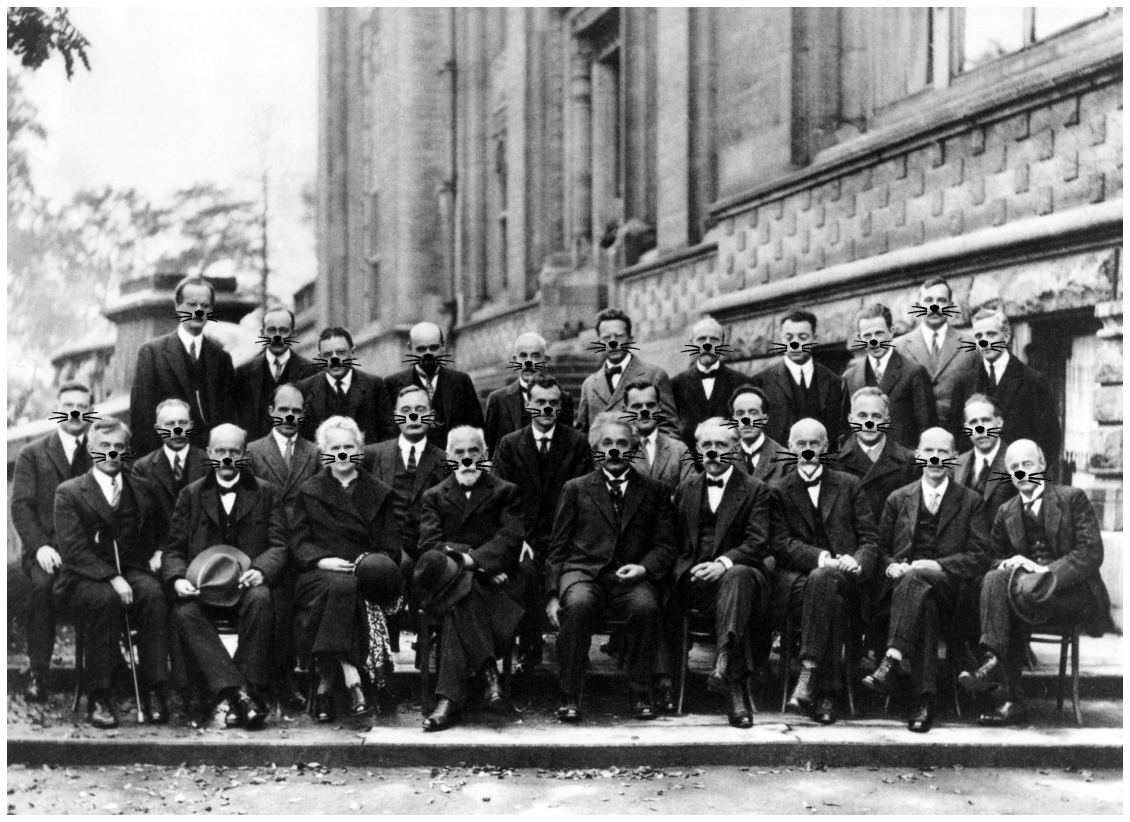

In [31]:
img2_final = img2.copy()

for dlib_rect, landmark in zip(dlib_rects_group, list_landmarks_group):
    s = sticker
    w = int(dlib_rect.width() * 1.35 * 1.2)
    h = w
    s = cv2.resize(s, dsize=(w, h))

    x = landmark[30][0] - dlib_rect.width()//2 - int(dlib_rect.width()*0.18 + w*0.09)
    y = landmark[29][1] - int(w/2.5)
    
    sticker_area = img2_final[y:y+s.shape[0], x:x+s.shape[1]]
    img2_final[y:y+s.shape[0], x:x+s.shape[1]] = \
    np.where(s==255,sticker_area,s).astype(np.uint8)
    
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(img2_final)
plt.show()

___
___
### Result
___

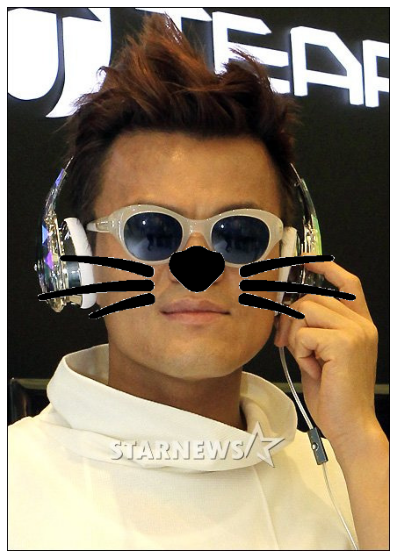

In [34]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img1_final_final)
plt.show()

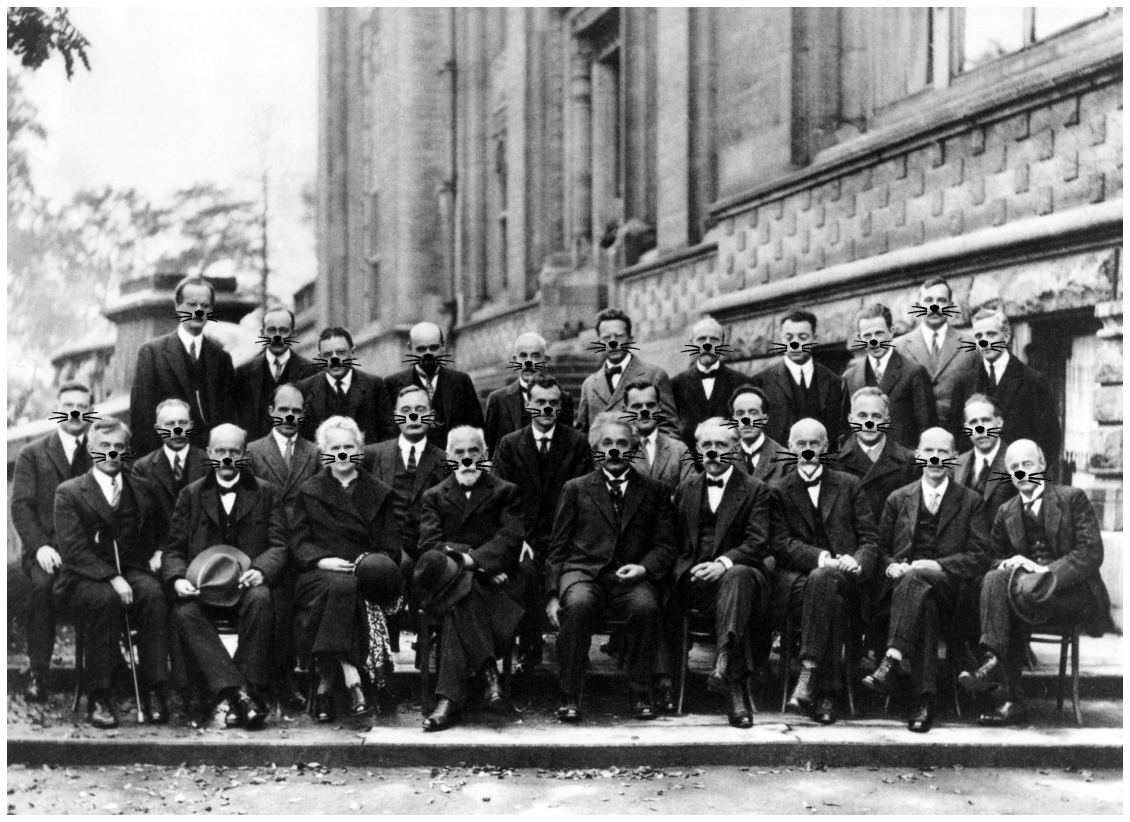

In [35]:
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(img2_final)
plt.show()

# 회고
## Today's essential concept

![](https://velog.velcdn.com/images/jujemu/post/21d795af-30bf-4688-b86c-fcccf4456d9b/image.png)

# 고양이 수염을 달아보자!

## Today's library
openCV
dlib

```
import cv2 # openCV
import dlib
```

## keypoint detection
_feat. landmark or alignment_

>Keypoint detection involves simultaneously detecting people and localizing their keypoints.  
 Keypoints are the same thing as interest points. They are spatial locations, or points in the image that define what is interesting or what stand out in the image.  
 They are invariant to image rotation, shrinkage, translation, distortion, and so on.

___https://paperswithcode.com/task/keypoint-detection___

## 차례
1. 이미지에서 얼굴 box; crop 추출 -> bounding box
2. bounding box에서 눈 코 입 귀 턱선 눈썹을 표시하는 landmark
3. landmark를 기준으로 스티커 붙이기

## 이미지 불러오기

```
img_path = '이미지 경로' + 'my_image.png'
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
```

### 기억할 점
#### cv2.imread
cv2.imread('img_path', 'flag') -> return img_bgr

flag; option
-1: color(default)
0: grey
1: with alpha_channel
  
_참고: https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html_

#### cv2.cvtColor

___openCV imread의 출력 img_bgr을 img_rgb로 보정한다.___

cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) -> return img_rgb

## 얼굴 찾기

```
import dlib

detector = dlib.get_frontal_face_detector()
dlib_rects = detector(img_rgb, 1)

dlib_rects # rectangles[[(345, 98) (531, 284)]]
```
### face_detector
detector(img_rgb, 'number of pyramid') -> return dlib rectengles; 대각선 두 점을 tuple로 출력

_with HOG & SVM_
_HOG; Histogram of Oriented Gradients 이미지 색상 변화량 감지_

이미지 피라미드?  
_참고 https://opencv-python.readthedocs.io/en/latest/doc/14.imagePyramid/imagePyramid.html_

number of pyramid: 값만큼 이미지에 face bounding box 좌표 출력

dlib.rectengle___s___ class는 dlib.rectengle class를 index 형태로 저장한다.

```
# 각 bounding box를 이미지에 표시

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
```

cv2.rectangle은 다음에 알아보자

## 이목구비 표시

_feat. face landmark, object keypoint estimation_

dlib ibug 300-W 데이터 기반 model로 구현하자

_in terminal_
```
$ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
$ bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2
```

### 특이사항
'wget ~~' mac 터미널에서 이 명령어를 입력하기 위해서는 homebrew를 다운받고 brew install wget으로 wget을 받아야한다. 
```
Warning: /opt/homebrew/bin is not in your PATH.
```
만약 이 과정에서 위와 같은 에러 메세지가 생성됨과 brew command가 먹히지 않는다면 PATH 설정이 안 된 것이다.

_참고 https://stackoverflow.com/questions/65487249/getting-a-warning-when-installing-homebrew-on-macos-big-sur-m1-chip_


## From Ex

이해하지 않고 시간에 쫒겨 그대로 복사하면 예상치 못한 곳에서 애를 쓰게 된다.  
왕관을 덧붙이는 예와는 다르게 np.where(sticker==0, ~) 을 생각없이 붙여넣었더니 고양이 수염이 있어야 할 곳이 비어나오는 현상을 겪는다.  
이 간단한 걸 해결하려고 꽤나 시간을 쓴 것 같다.  (np.where(sticker==255, ~)

추가로 여유가 된다면 내장 카메라의 동영상 기능을 이용해서 스티커가 따라 다니는 것을 구현하고 싶다.